In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import numpy.linalg as la
import matplotlib.style as style

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
# print(mpl.rcParams['font.size'])
mpl.rcParams['font.size'] = 13.5

# Conclave

In [17]:
# data_sizes = ['1MB', '10MB', '100MB', '1GB', '10GB']
data_sizes = ['1MB', '10MB']
query_numbers = [5]
data_size = '1MB'
query_num = 5

time_taken_col = "time_taken"
cols = ["size", "timestamp", time_taken_col]

conclave_medians = [float("nan")] * 5
conclave_stdevs = [float("nan")] * 5

for i, d in enumerate(data_sizes):
    try:
        path = f"../conclave/join/{d}join.csv"

        # get column with time taken
        data = pd.read_csv(path, names=cols, header=None)
        time_col = data.loc[:,time_taken_col]

        # get median and stdev        
        conclave_medians[i] = time_col.median()
        conclave_stdevs[i] = time_col.std()

    except Exception as e:
        print(f"Failed to read file {path} with error {e}")

print("Medians: ", conclave_medians)
print("Stdevs: ", conclave_stdevs)

Medians:  [11.21567203500308, 56.20358712098096, nan, nan, nan]
Stdevs:  [0.24267258165293218, 0.9170295529529938, nan, nan, nan]


# Data Station

In [18]:
data_sizes = ['1MB', '10MB', '100MB', '1GB', '10GB']

datastation_medians = [float("nan")] * 5
datastation_stdevs = [float("nan")] * 5

time_taken_col = "time_taken"
cols = [time_taken_col]

for i, data_size in enumerate(data_sizes):
    path = f"../datastation-escrow/examples/join_scenario/join/{data_size}.csv"
    
    try:
        data = pd.read_csv(path, names=cols, header=None)
        time_col = data.loc[:,time_taken_col]
        
        # remove first element as it is an outlier
        datastation_medians[i] = time_col[1:].median()
        datastation_stdevs[i] = time_col[1:].std()
    except Exception as e:
        print(f"Failed to read file {path} with error {e}")

print("Medians: ", datastation_medians)
print("Stdevs: ", datastation_stdevs)

Medians:  [1.9919357380131262, 2.081116035056766, 2.508428410976194, 5.970111251983326, 36.32579725951655]
Stdevs:  [0.012046813913785571, 0.020279430868332667, 0.02685770806373246, 0.05080174516928343, 0.105397444972004]


# Fast PSI

In [19]:
data_sizes = ['1MB', '10MB', '100MB', '1GB', '10GB']

size_names = [750,7500,75000,750000,7500000]

fpsi_medians = [float("nan")] * 5
fpsi_stdevs = [float("nan")] * 5

time_taken_col = "time_taken"
cols = [time_taken_col, "offline", "online"]

for i, data_size in enumerate(data_sizes):
    path = f"../Private-Set-Intersection/experiments/ssize{size_names[i]}csize{size_names[i]}.csv"
    try:
        data = pd.read_csv(path, names=cols, header=None)
        time_col = data.loc[:,time_taken_col]
        
        fpsi_medians[i] = time_col.median()
        fpsi_stdevs[i] = time_col.std()
    except:
        print(f"Failed to read file {path}")

print("Medians: ", fpsi_medians)
print("Stdevs: ", fpsi_stdevs)

Medians:  [2.8469567779975478, 5.926861659012502, 28.007427279997497, 457.3182843095128, 30035.189806732014]
Stdevs:  [0.48272310559785203, 0.5198881099798125, 0.2590606728839375, 6.883919892548538, 222.78252562724376]


# Plaintext

In [20]:
data_sizes = ['1MB', '10MB', '100MB', '1GB', '10GB']

plaintext_medians = [float("nan")] * 5
plaintext_stdevs = [float("nan")] * 5

time_taken_col = "time_taken"
cols = [time_taken_col]

for i, data_size in enumerate(data_sizes):
    path = f"../plaintext_tpch_experiments/experiments/join/{data_size}.csv"
    try:
        data = pd.read_csv(path, names=cols, header=None)
        time_col = data.loc[:,time_taken_col]
        
        # remove first trial
        plaintext_medians[i] = time_col[1:].median()
        plaintext_stdevs[i] = time_col[1:].std()
    except:
        print(f"Failed to read file {path}")

print("Medians: ", plaintext_medians)
print("Stdevs: ", plaintext_stdevs)

Medians:  [0.04022979451110585, 0.1038251284626312, 0.2757127200602554, 0.9542891629389487, 4.785003769036848]
Stdevs:  [0.0009776244036412574, 0.0017116025109530288, 0.004967200928951495, 0.019502697447439144, 0.11842197812046669]


# Lattigo

In [21]:
data_sizes = ['1MB', '10MB', '100MB', '1GB', '10GB']

lattigo_medians = [float("nan")] * 5
lattigo_stdevs = [float("nan")] * 5

time_taken_col = "time_taken"
cols = [time_taken_col]

for i, data_size in enumerate(data_sizes):
    path = f"../lattigo-experiments/experiments/{data_size}.csv"
    try:
        data = pd.read_csv(path, names=cols, header=None)
        time_col = data.loc[:,time_taken_col]
        # drop first trial
        time_col = time_col[1:]
        
        lattigo_medians[i] = time_col.median()
        lattigo_stdevs[i] = time_col.std()
    except:
        print(f"Failed to read file {path}")

print("Medians: ", lattigo_medians)
print("Stdevs: ", lattigo_stdevs)

Medians:  [0.31364999944344163, 0.4228281039977446, 2.3750425429316238, 18.28812491206918, 166.86626873607747]
Stdevs:  [0.014549526831814931, 0.01608692691735544, 0.021859803374951164, 0.2791525963454841, 3.3488653404685]


# Plots

[1 2 3 4 5]
[nan, nan, 0.0005, 0.0005, 0.0005]


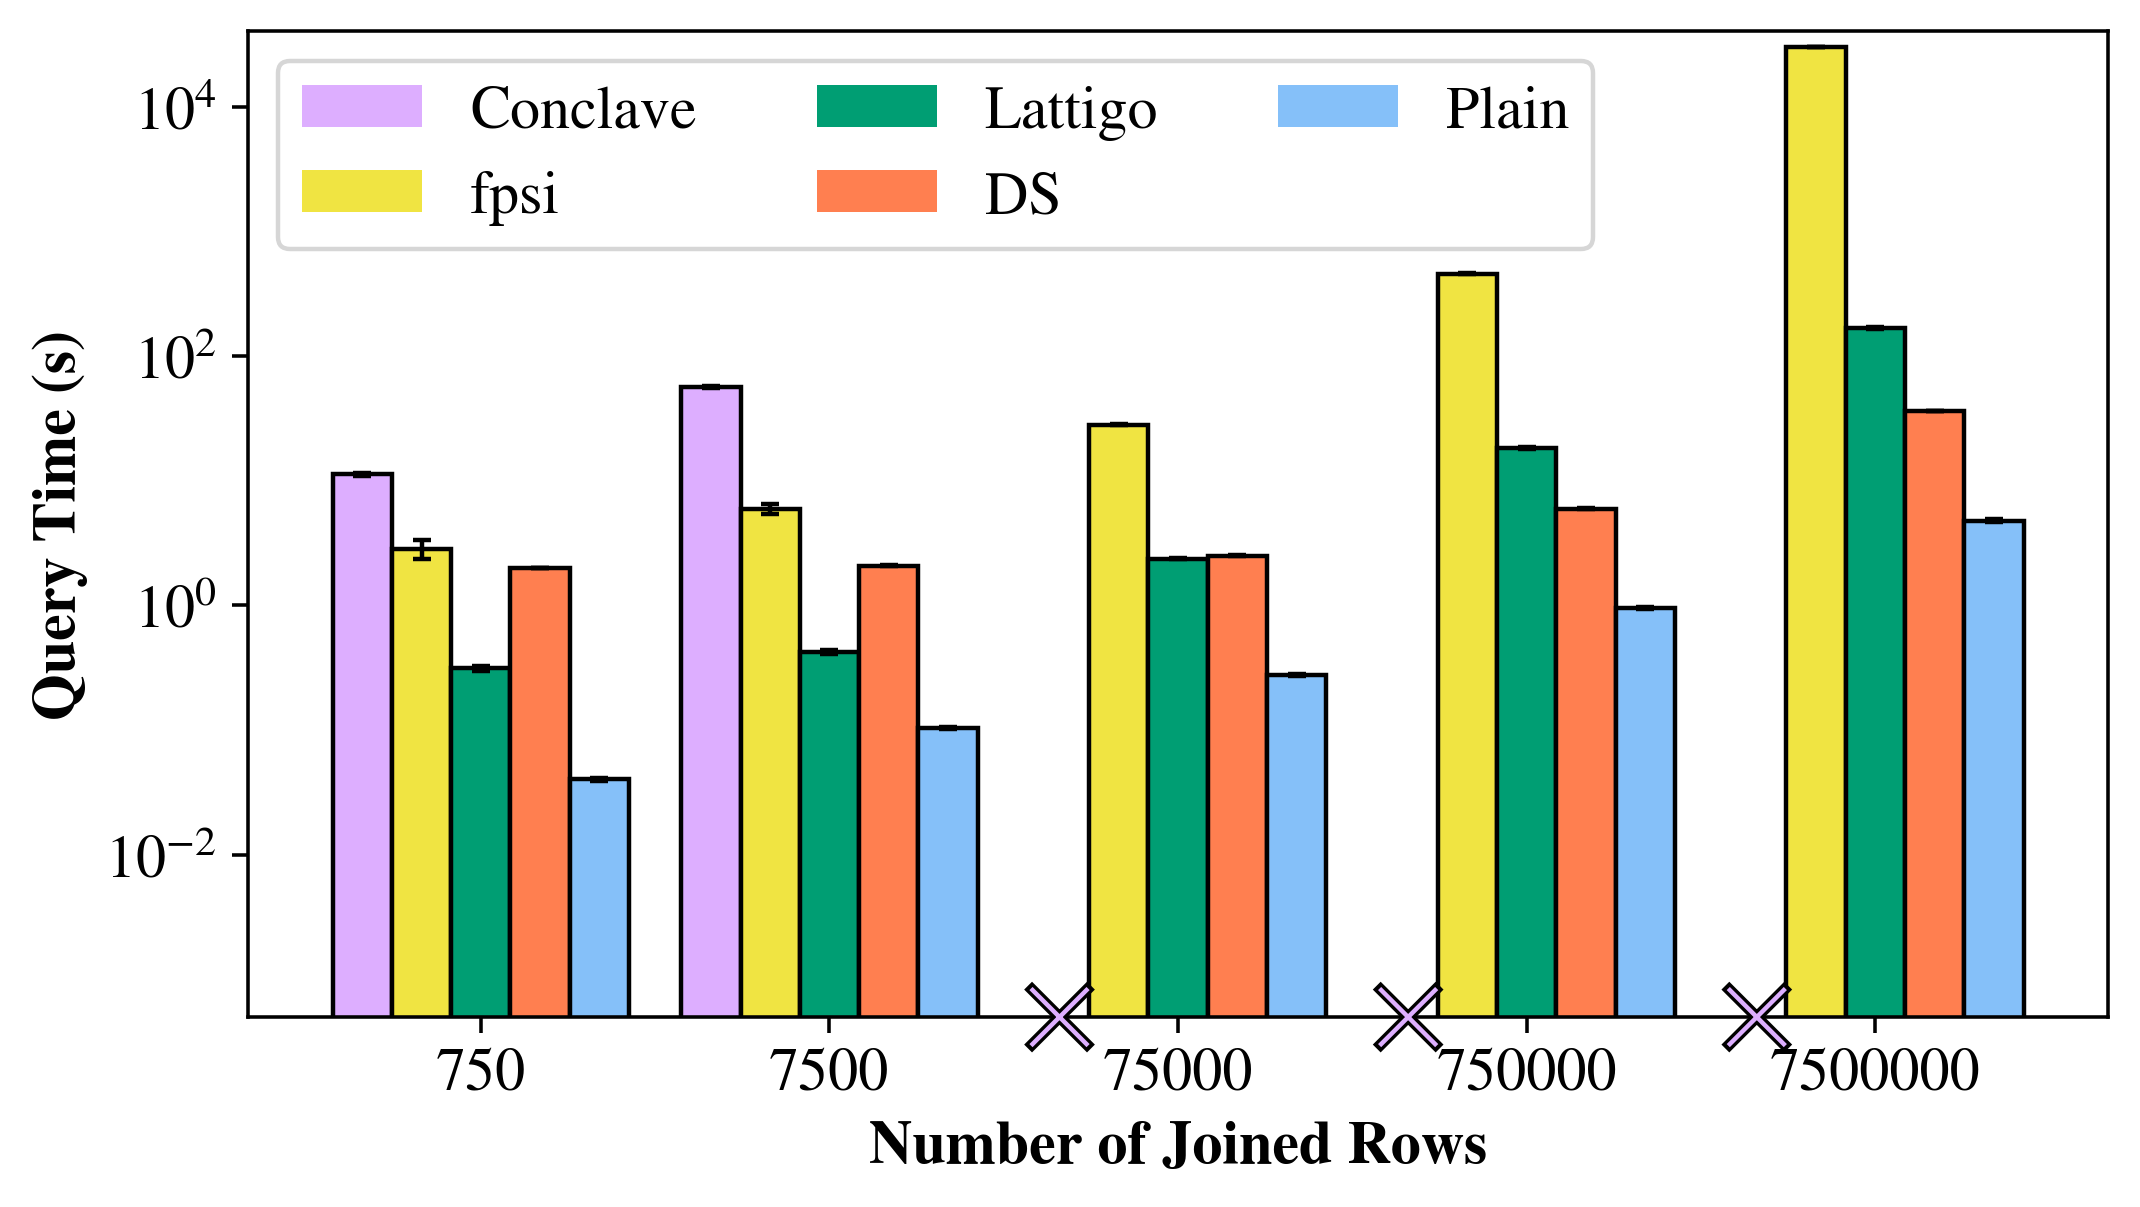

In [22]:
X_axis = np.arange(5) + 1

width = 0.17

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)
min_y = 0.0005
max_y = 40000

plt.figure(figsize=(7.5, 4), dpi=320)
plt.yscale('log')

print(X_axis)

# Conclave
plt.bar(x=X_axis-2*width,width=width,height=conclave_medians,label="Conclave",
        color='#ddaeff'
        )
plt.bar(x=X_axis-2*width,width=width,height=conclave_medians,yerr=conclave_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
left_x = [float("nan") if not np.isnan(row) else 0.0005 for row in conclave_medians]
print(left_x)
plt.scatter(X_axis-2*width, left_x, [200]*5,
        #    edgecolors='black',
        #    facecolors = 'black',
           marker='x',
           color = "black",
           zorder=4,
           clip_on=False,
           linewidths=2.5,
            )

plt.scatter(X_axis-2*width,left_x, [165]*5,
        #     edgecolors='black',
        #     facecolors = 'black',
            marker='x',
            color = "#ddaeff",
            zorder=4,
            clip_on=False,
            linewidths=1,
            )

# Fast PSI
plt.bar(x=X_axis-width, width=width, height=fpsi_medians, label = "fpsi",
        color='#f0e442')

plt.bar(x=X_axis-width, width=width,height=fpsi_medians,yerr=fpsi_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

# Lattigo
plt.bar(x=X_axis,width=width,height=lattigo_medians,label="Lattigo",
        color='#009E73'
        )
plt.bar(x=X_axis,width=width,height=lattigo_medians,yerr=lattigo_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

# Data Station
plt.bar(x=X_axis+width,width=width,height=datastation_medians,label="DS",
        color='coral'
        )

plt.bar(x=X_axis+width,width=width,height=datastation_medians,yerr=datastation_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

# Plaintext
plt.bar(x=X_axis+2*width, width=width, height=plaintext_medians, label = "Plain",
        color='#85C0F9')

plt.bar(x=X_axis+2*width,width=width,height=plaintext_medians,yerr=plaintext_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )


axes = plt.gca()
axes.set_ylim([min_y,max_y])


plt.xlabel("Number of Joined Rows", fontweight="bold")
plt.ylabel("Query Time (s)", fontweight="bold")
plt.legend(ncol=3)

plt.xticks(X_axis, [750,7500,75000,750000,7500000])

plt.savefig("join.pdf", bbox_inches='tight')

plt.show()